# To Do:
- Get mean of a genre's ratings
- Split genres into distinct entries (leaves many movies counted twice, so also want to use data of co-occurring genres)

In [35]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import zipfile

In [2]:
!ls ../../zippedData/

bom.movie_gross.csv.gz
im.db.zip
rt.movie_info.tsv.gz
rt.reviews.tsv.gz
tmdb.movies.csv.gz
tn.movie_budgets.csv.gz


In [45]:
movieGrossData = pd.read_csv("../../zippedData/bom.movie_gross.csv.gz")
movieGrossData

title      studio  domestic_gross  \
0                                     Toy Story 3          BV     415000000.0   
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          1700.0   

     foreign_gross  year  
0        652000000  2010  
1        691300000  2010  
2        664300000  2010  
3        535700000  2010  
4        513900000  2010  
...            ...   ...  
3382           NaN  2018  
3383           NaN  2018  
3384           NaN  2018  
3385           NaN  2018  
3386           NaN  2018  

[3387 rows x 5 columns]

In [16]:
movieBudgetData = pd.read_csv("../../zippedData/tn.movie_budgets.csv.gz")
movieBudgetData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [15]:
movieBaseData = pd.read_csv("../../zippedData/tmdb.movies.csv.gz")
movieBaseData

Unnamed: 0            genre_ids      id original_language  \
0               0      [12, 14, 10751]   12444                en   
1               1  [14, 12, 16, 10751]   10191                en   
2               2        [12, 28, 878]   10138                en   
3               3      [16, 35, 10751]     862                en   
4               4        [28, 878, 12]   27205                en   
...           ...                  ...     ...               ...   
26512       26512             [27, 18]  488143                en   
26513       26513             [18, 53]  485975                en   
26514       26514         [14, 28, 12]  381231                en   
26515       26515      [10751, 12, 28]  366854                en   
26516       26516             [53, 27]  309885                en   

                                     original_title  popularity release_date  \
0      Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
1                          How to Train Your Dragon      28.734   2010-03-26   
2                                        Iron Man 2      28.515   2010-05-07   
3                                         Toy Story      28.005   1995-11-22   
4                                         Inception      27.920   2010-07-16   
...                                             ...         ...          ...   
26512                         Laboratory Conditions       0.600   2018-10-13   
26513                               _EXHIBIT_84xxx_       0.600   2018-05-01   
26514                                  The Last One       0.600   2018-10-01   
26515                                  Trailer Made       0.600   2018-06-22   
26516                                    The Church       0.600   2018-10-05   

                                              title  vote_average  vote_count  
0      Harry Potter and the Deathly Hallows: Part 1           7.7       10788  
1                          How to Train Your Dragon           7.7        7610  
2                                        Iron Man 2           6.8       12368  
3                                         Toy Story           7.9       10174  
4                                         Inception           8.3       22186  
...                                             ...           ...         ...  
26512                         Laboratory Conditions           0.0           1  
26513                               _EXHIBIT_84xxx_           0.0           1  
26514                                  The Last One           0.0           1  
26515                                  Trailer Made           0.0           1  
26516                                    The Church           0.0           1  

[26517 rows x 10 columns]

### Least Useful Data
- Rotten Tomatoes Data missing movie names, not useful data
- Name could be extracted from synopsis at least in some cases, but too time consuming and tedious to be worthwhile

In [6]:
# rtReviews = pd.read_csv("../../zippedData/rt.movie_info.tsv.gz",sep='\t')
# rtReviews

id                                           synopsis rating  \
0        1  This gritty, fast-paced, and innovative police...      R   
1        3  New York City, not-too-distant-future: Eric Pa...      R   
2        5  Illeana Douglas delivers a superb performance ...      R   
3        6  Michael Douglas runs afoul of a treacherous su...      R   
4        7                                                NaN     NR   
...    ...                                                ...    ...   
1555  1996  Forget terrorists or hijackers -- there's a ha...      R   
1556  1997  The popular Saturday Night Live sketch was exp...     PG   
1557  1998  Based on a novel by Richard Powell, when the l...      G   
1558  1999  The Sandlot is a coming-of-age story about a g...     PG   
1559  2000  Suspended from the force, Paris cop Hubert is ...      R   

                                                  genre            director  \
0                   Action and Adventure|Classics|Drama    William Friedkin   
1                     Drama|Science Fiction and Fantasy    David Cronenberg   
2                     Drama|Musical and Performing Arts      Allison Anders   
3                            Drama|Mystery and Suspense      Barry Levinson   
4                                         Drama|Romance      Rodney Bennett   
...                                                 ...                 ...   
1555   Action and Adventure|Horror|Mystery and Suspense                 NaN   
1556                 Comedy|Science Fiction and Fantasy        Steve Barron   
1557  Classics|Comedy|Drama|Musical and Performing Arts      Gordon Douglas   
1558    Comedy|Drama|Kids and Family|Sports and Fitness  David Mickey Evans   
1559  Action and Adventure|Art House and Internation...                 NaN   

                                                writer  theater_date  \
0                                       Ernest Tidyman   Oct 9, 1971   
1                         David Cronenberg|Don DeLillo  Aug 17, 2012   
2                                       Allison Anders  Sep 13, 1996   
3                      Paul Attanasio|Michael Crichton   Dec 9, 1994   
4                                         Giles Cooper           NaN   
...                                                ...           ...   
1555                                               NaN  Aug 18, 2006   
1556  Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner  Jul 23, 1993   
1557                                               NaN   Jan 1, 1962   
1558                  David Mickey Evans|Robert Gunter   Apr 1, 1993   
1559                                        Luc Besson  Sep 27, 2001   

          dvd_date currency  box_office      runtime             studio  
0     Sep 25, 2001      NaN         NaN  104 minutes                NaN  
1      Jan 1, 2013        $     600,000  108 minutes  Entertainment One  
2     Apr 18, 2000      NaN         NaN  116 minutes                NaN  
3     Aug 27, 1997      NaN         NaN  128 minutes                NaN  
4              NaN      NaN         NaN  200 minutes                NaN  
...            ...      ...         ...          ...                ...  
1555   Jan 2, 2007        $  33,886,034  106 minutes    New Line Cinema  
1556  Apr 17, 2001      NaN         NaN   88 minutes  Paramount Vantage  
1557  May 11, 2004      NaN         NaN  111 minutes                NaN  
1558  Jan 29, 2002      NaN         NaN  101 minutes                NaN  
1559  Feb 11, 2003      NaN         NaN   94 minutes  Columbia Pictures  

[1560 rows x 12 columns]

In [7]:
# rtMovieData = pd.read_csv("../../zippedData/rt.movie_info.tsv.gz",sep='\t')
# rtMovieData

id                                           synopsis rating  \
0        1  This gritty, fast-paced, and innovative police...      R   
1        3  New York City, not-too-distant-future: Eric Pa...      R   
2        5  Illeana Douglas delivers a superb performance ...      R   
3        6  Michael Douglas runs afoul of a treacherous su...      R   
4        7                                                NaN     NR   
...    ...                                                ...    ...   
1555  1996  Forget terrorists or hijackers -- there's a ha...      R   
1556  1997  The popular Saturday Night Live sketch was exp...     PG   
1557  1998  Based on a novel by Richard Powell, when the l...      G   
1558  1999  The Sandlot is a coming-of-age story about a g...     PG   
1559  2000  Suspended from the force, Paris cop Hubert is ...      R   

                                                  genre            director  \
0                   Action and Adventure|Classics|Drama    William Friedkin   
1                     Drama|Science Fiction and Fantasy    David Cronenberg   
2                     Drama|Musical and Performing Arts      Allison Anders   
3                            Drama|Mystery and Suspense      Barry Levinson   
4                                         Drama|Romance      Rodney Bennett   
...                                                 ...                 ...   
1555   Action and Adventure|Horror|Mystery and Suspense                 NaN   
1556                 Comedy|Science Fiction and Fantasy        Steve Barron   
1557  Classics|Comedy|Drama|Musical and Performing Arts      Gordon Douglas   
1558    Comedy|Drama|Kids and Family|Sports and Fitness  David Mickey Evans   
1559  Action and Adventure|Art House and Internation...                 NaN   

                                                writer  theater_date  \
0                                       Ernest Tidyman   Oct 9, 1971   
1                         David Cronenberg|Don DeLillo  Aug 17, 2012   
2                                       Allison Anders  Sep 13, 1996   
3                      Paul Attanasio|Michael Crichton   Dec 9, 1994   
4                                         Giles Cooper           NaN   
...                                                ...           ...   
1555                                               NaN  Aug 18, 2006   
1556  Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner  Jul 23, 1993   
1557                                               NaN   Jan 1, 1962   
1558                  David Mickey Evans|Robert Gunter   Apr 1, 1993   
1559                                        Luc Besson  Sep 27, 2001   

          dvd_date currency  box_office      runtime             studio  
0     Sep 25, 2001      NaN         NaN  104 minutes                NaN  
1      Jan 1, 2013        $     600,000  108 minutes  Entertainment One  
2     Apr 18, 2000      NaN         NaN  116 minutes                NaN  
3     Aug 27, 1997      NaN         NaN  128 minutes                NaN  
4              NaN      NaN         NaN  200 minutes                NaN  
...            ...      ...         ...          ...                ...  
1555   Jan 2, 2007        $  33,886,034  106 minutes    New Line Cinema  
1556  Apr 17, 2001      NaN         NaN   88 minutes  Paramount Vantage  
1557  May 11, 2004      NaN         NaN  111 minutes                NaN  
1558  Jan 29, 2002      NaN         NaN  101 minutes                NaN  
1559  Feb 11, 2003      NaN         NaN   94 minutes  Columbia Pictures  

[1560 rows x 12 columns]

In [39]:
!ls ../../zippedData

bom.movie_gross.csv.gz
im.db
im.db.zip
rt.movie_info.tsv.gz
rt.reviews.tsv.gz
tmdb.movies.csv.gz
tn.movie_budgets.csv.gz


In [38]:
with zipfile.ZipFile('../../zippedData/im.db.zip') as zipref:
    zipref.extractall('../../zippedData/')

In [41]:
con = sqlite3.connect('../../zippedData/im.db')

In [48]:
imdbMovieBase = pd.read_sql("""

SELECT *
FROM movie_basics

""",con)

In [51]:
imdbMovieBase.describe()

start_year  runtime_minutes
count  146144.000000    114405.000000
mean     2014.621798        86.187247
std         2.733583       166.360590
min      2010.000000         1.000000
25%      2012.000000        70.000000
50%      2015.000000        87.000000
75%      2017.000000        99.000000
max      2115.000000     51420.000000

In [53]:
imdbMovieRatings = pd.read_sql("""

SELECT *
FROM movie_ratings

""",con)

imdbMovieRatings

movie_id  averagerating  numvotes
0      tt10356526            8.3        31
1      tt10384606            8.9       559
2       tt1042974            6.4        20
3       tt1043726            4.2     50352
4       tt1060240            6.5        21
...           ...            ...       ...
73851   tt9805820            8.1        25
73852   tt9844256            7.5        24
73853   tt9851050            4.7        14
73854   tt9886934            7.0         5
73855   tt9894098            6.3       128

[73856 rows x 3 columns]

In [141]:
imdbMovies = pd.read_sql("""

SELECT mb.primary_title AS Title,
    mb.genres AS Genres,
    mr.averagerating AS Rating,
    mr.numvotes AS VoteCount,
    mb.start_year AS ReleaseYear,
    mb.runtime_minutes AS Runtime
FROM movie_basics as mb
    JOIN movie_ratings as mr
        ON mr.movie_id = mb.movie_id
WHERE mr.numvotes >= 1000
ORDER BY start_year DESC, Rating DESC

""",con)

In [142]:
imdbMovies['Genres'] = imdbMovies['Genres'].str.split(',')

In [152]:
imdbMovies['Genres'][0]

['Comedy', 'Drama']

In [143]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(imdbMovies)

Title  \
0                     Once Upon a Time ... in Hollywood   
1                                     Truth and Justice   
2                                                Jersey   
3                                           Tell No One   
4                                                 Chase   
5                                     Kumbalangi Nights   
6                                          Super Deluxe   
7                                     Avengers: Endgame   
8                                              Parasite   
9                                        Breaking Barbi   
10                                                Yatra   
11                             Uri: The Surgical Strike   
12                                            Apollo 11   
13                                   The Tashkent Files   
14                                            Gully Boy   
15                                               Thadam   
16                                                Badla   
17                    John Wick: Chapter 3 - Parabellum   
18                                             Maharshi   
19                                      The Balkan Line   
20                                            Rocketman   
21                                         Madhura Raja   
22                                                  122   
23                                              Lucifer   
24                                       Pain and Glory   
25                                          Last Breath   
26                                               Kesari   
27                       The Boy Who Harnessed the Wind   
28                           Once Upon a Time in London   
29                                      The Wolf's Call   
30           How to Train Your Dragon: The Hidden World   
31                                  Alita: Battle Angel   
32                                            Booksmart   
33                        Homecoming: A Film by Beyoncé   
34                                           Sonchiriya   
35                                                Petta   
36                                              Aladdin   
37                         The Professor and the Madman   
38                                              Shazam!   
39                                      A Dog's Journey   
40                                                 Fyre   
41                      Romulus & Remus: The First King   
42                                              9: Nine   
43                                               Majiji   
44                              Fighting with My Family   
45                                      Five Feet Apart   
46                                          The Mustang   
47                                          Extreme Job   
48                                            Long Shot   
49                                            Paddleton   
50        The Inventor: Out for Blood in Silicon Valley   
51                                                  NGK   
52                                    Leaving Neverland   
53                                                   Us   
54                                       The Highwaymen   
55                                       Captain Marvel   
56                                             The Dirt   
57                                         Missing Link   
58                                            Excursion   
59                                              Tolkien   
60                                   Always Be My Maybe   
61                                  Fisherman's Friends   
62                                       De De Pyaar De   
63                                          I Am Mother   
64                                            Storm Boy   
65                                         Guava Island   
66                                         The Last Boy   
67                                    

In [128]:
#Update this to grab the mean of a genre's ratings
imdbGenres = pd.read_sql("""

SELECT mr.averagerating AS Rating,
    mb.genres AS Genres
FROM movie_basics as mb
    JOIN movie_ratings as mr
        ON mr.movie_id = mb.movie_id
WHERE mr.numvotes >= 1000
GROUP BY Genres
ORDER BY Rating DESC

""",con)

In [129]:
imdbGenres['Genres'] = imdbGenres['Genres'].str.split(',')

In [130]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(imdbGenres)

Rating  VoteCount  Runtime                               Genres
0       9.2       1015    124.0       [Comedy, Documentary, History]
1       8.9       1656     84.0                           [Thriller]
2       8.8       4583    178.0              [Drama, Music, Musical]
3       8.6       1326     85.0                            [Musical]
4       8.6       1583     96.0              [Documentary, Thriller]
5       8.6       1505    120.0             [Comedy, Fantasy, Music]
6       8.5      43409    139.0                    [Crime, Thriller]
7       8.5       1224    130.0               [Action, Romance, War]
8       8.4      15612     99.0          [Documentary, History, War]
9       8.4       1272     59.0           [Documentary, Drama, News]
10      8.4       7279    135.0            [Comedy, Crime, Thriller]
11      8.3       1638     99.0                  [Romance, Thriller]
12      8.3     124156    131.0                [Drama, Mystery, War]
13      8.3      14128    104.0             [Drama, Fantasy, Horror]
14      8.3       2996    150.0            [Drama, Family, Thriller]
15      8.3       7286    109.0        [Documentary, History, Music]
16      8.3       3820     88.0                [Documentary, Family]
17      8.3      65304    109.0                 [Crime, Documentary]
18      8.3       7451    135.0                 [Animation, History]
19      8.3       7288     80.0      [Adventure, Documentary, Sport]
20      8.3       3239    135.0           [Action, Biography, Drama]
21      8.2       2437     96.0                                [War]
22      8.2       1012    141.0            [Drama, Musical, Romance]
23      8.2       1513    104.0                 [Documentary, Sport]
24      8.2       3894    125.0         [Documentary, History, News]
25      8.2       1014     93.0    [Animation, Documentary, Mystery]
26      8.2       6931     90.0      [Adventure, Documentary, Drama]
27      8.2       5707    135.0               [Action, Crime, Drama]
28      8.1       7848     73.0       [Biography, Documentary, News]
29      8.1       5406    163.0           [Animation, Comedy, Drama]
30      8.1     691835    130.0          [Adventure, Drama, Fantasy]
31      8.1       6993    100.0  [Adventure, Biography, Documentary]
32      8.0       3452    112.0        [Documentary, History, Sport]
33      8.0       2999    146.0           [Comedy, Sci-Fi, Thriller]
34      8.0      58721     87.0         [Comedy, Crime, Documentary]
35      8.0       1038    109.0        [Animation, Fantasy, Mystery]
36      8.0       6552     82.0      [Animation, Crime, Documentary]
37      8.0       3839    160.0               [Action, Drama, Sport]
38      8.0      12704     75.0                [Action, Documentary]
39      8.0     621193    156.0       [Action, Adventure, Biography]
40      7.9       5279    130.0           [Drama, Musical, Thriller]
41      7.9      28979    120.0       [Documentary, Sport, Thriller]
42      7.9       1418     85.0         [Comedy, Documentary, Drama]
43      7.9       1053    102.0                          [Animation]
44      7.9       1202    133.0                                 None
45      7.8       1891    138.0                      [Family, Sport]
46      7.8       2553     97.0                  [Documentary, News]
47      7.8       2159     98.0        [Documentary, Drama, History]
48      7.8     387402    134.0         [Biography, Drama, Thriller]
49      7.8       4321     94.0    [Biography, Documentary, Mystery]
50      7.8       4640     90.0          [Animation, Drama, Mystery]
51      7.8       2345     94.0          [Animation, Drama, History]
52      7.8      39737     94.0        [Animation, Biography, Crime]
53      7.8       3740     89.0    [Adventure, Documentary, History]
54      7.8       1509     72.0     [Adventure, Documentary, Family]
55      7.8       2059    111.0         [Action, Documentary, Sport]
56      7.7       1842    117.0                         [Drama, War]
57 

In [133]:
imdbGenreCount = pd.read_sql("""

SELECT DISTINCT genres 
FROM movie_basics as mb
    JOIN movie_ratings as mr
        ON mr.movie_id = mb.movie_id
WHERE mr.numvotes >= 1000
GROUP BY Genres
ORDER BY mr.averagerating DESC

""",con)

In [137]:
imdbGenreCount['genres'] = imdbGenreCount['genres'].str.split(',')

In [138]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(imdbGenreCount)

genres
0         [Comedy, Documentary, History]
1                             [Thriller]
2                [Drama, Music, Musical]
3                              [Musical]
4                [Documentary, Thriller]
5               [Comedy, Fantasy, Music]
6                      [Crime, Thriller]
7                 [Action, Romance, War]
8            [Documentary, History, War]
9             [Documentary, Drama, News]
10             [Comedy, Crime, Thriller]
11                   [Romance, Thriller]
12                 [Drama, Mystery, War]
13              [Drama, Fantasy, Horror]
14             [Drama, Family, Thriller]
15         [Documentary, History, Music]
16                 [Documentary, Family]
17                  [Crime, Documentary]
18                  [Animation, History]
19       [Adventure, Documentary, Sport]
20            [Action, Biography, Drama]
21                                 [War]
22             [Drama, Musical, Romance]
23                  [Documentary, Sport]
24          [Documentary, History, News]
25     [Animation, Documentary, Mystery]
26       [Adventure, Documentary, Drama]
27                [Action, Crime, Drama]
28        [Biography, Documentary, News]
29            [Animation, Comedy, Drama]
30           [Adventure, Drama, Fantasy]
31   [Adventure, Biography, Documentary]
32         [Documentary, History, Sport]
33            [Comedy, Sci-Fi, Thriller]
34          [Comedy, Crime, Documentary]
35         [Animation, Fantasy, Mystery]
36       [Animation, Crime, Documentary]
37                [Action, Drama, Sport]
38                 [Action, Documentary]
39        [Action, Adventure, Biography]
40            [Drama, Musical, Thriller]
41        [Documentary, Sport, Thriller]
42          [Comedy, Documentary, Drama]
43                           [Animation]
44                                  None
45                       [Family, Sport]
46                   [Documentary, News]
47         [Documentary, Drama, History]
48          [Biography, Drama, Thriller]
49     [Biography, Documentary, Mystery]
50           [Animation, Drama, Mystery]
51           [Animation, Drama, History]
52         [Animation, Biography, Crime]
53     [Adventure, Documentary, History]
54      [Adventure, Documentary, Family]
55          [Action, Documentary, Sport]
56                          [Drama, War]
57               [Drama, History, Music]
58              [Drama, Family, Romance]
59        [Comedy, Documentary, Musical]
60     [Biography, Documentary, History]
61           [Animation, Drama, Fantasy]
62            [Animation, Drama, Family]
63           [Animation, Comedy, Family]
64      [Action, Adventure, Documentary]
65                              [Action]
66                      [Drama, Mystery]
67             [Drama, History, Musical]
68              [Drama, Family, Musical]
69                [Documentary, Mystery]
70                               [Crime]
71              [Comedy, Music, Romance]
72            [Comedy, Fantasy, Romance]
73     [Biography, Documentary, Fantasy]
74       [Biography, Crime, Documentary]
75   [Animation, Biography, Documentary]
76              [Adventure, Documentary]
77                [Drama, Thriller, War]
78           [Documentary, Drama, Music]
79              [Crime, Drama, Thriller]
80           [Comedy, Romance, Thriller]
81           [Biography, Music, Romance]
82              [Biography, Documentary]
83          [Adventure, Fantasy, Sci-Fi]
84            [Action, Adventure, Crime]
85              [Drama, Sport, Thriller]
86              [Drama, Horror, Mystery]
87           [Biography, Drama, Mystery]
88       [Biography, Documentary, Music]
89          [Animation, Romance, Sci-Fi]
90             [Action, Crime, Thriller]
91             [Action, Comedy, Western]
92                      [Action, Comedy]
93         [Action, Adventure, Thriller]
94                             [History]
95            [Drama, Fantasy, Thriller]
96                    [Documentary, War]
97              

In [106]:
imdbMovies['Genres'] = imdbMovies['Genres'].str.split(',')

<AxesSubplot:xlabel='Runtime', ylabel='Rating'>

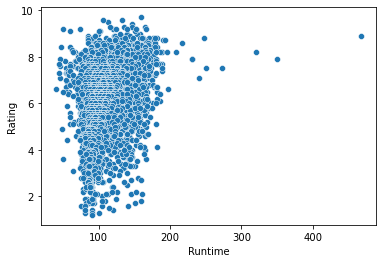

In [103]:
sns.bar(x=imdbMovies['Runtime'],y=imdbMovies['Rating'])

In [74]:
pd.read_sql("""

SELECT *
FROM movie_basics as mb
    JOIN movie_ratings as mr
        ON mr.movie_id = mb.movie_id
    JOIN 
WHERE mr.numvotes > 1000

""",con)

movie_id                       primary_title  \
0     tt1043726              The Legend of Hercules   
1     tt1094666                          The Hammer   
2     tt1171222                       Baggage Claim   
3     tt1174693                 The Four-Faced Liar   
4     tt1181840     Jack and the Cuckoo-Clock Heart   
...         ...                                 ...   
9606  tt8443704                             Dear Ex   
9607  tt8564902                   Death of a Nation   
9608  tt8574252  The Witch: Part 1 - The Subversion   
9609  tt8948790                              Jersey   
9610  tt9558612                    PM Narendra Modi   

                     original_title  start_year  runtime_minutes  \
0            The Legend of Hercules        2014             99.0   
1                            Hamill        2010            108.0   
2                     Baggage Claim        2013             96.0   
3               The Four-Faced Liar        2010             87.0   
4     Jack et la mécanique du coeur        2013             94.0   
...                             ...         ...              ...   
9606                        Dear Ex        2018            100.0   
9607              Death of a Nation        2018            108.0   
9608                         Manyeo        2018            125.0   
9609                         Jersey        2019            157.0   
9610               PM Narendra Modi        2019            136.0   

                         genres   movie_id  averagerating  numvotes  
0      Action,Adventure,Fantasy  tt1043726            4.2     50352  
1         Biography,Drama,Sport  tt1094666            7.0      1613  
2                        Comedy  tt1171222            5.1      8296  
3          Comedy,Drama,Romance  tt1174693            5.8      2381  
4     Adventure,Animation,Drama  tt1181840            7.0      5494  
...                         ...        ...            ...       ...  
9606       Comedy,Drama,Romance  tt8443704            7.5      1947  
9607        Documentary,History  tt8564902            4.7      5863  
9608             Action,Mystery  tt8574252            7.1      1526  
9609                Drama,Sport  tt8948790            9.0      1778  
9610            Biography,Drama  tt9558612            3.7      4057  

[9611 rows x 9 columns]

In [76]:
pd.read_sql("""

SELECT *
FROM known_for as k
    JOIN writers as w
        ON w.movie_id = k.movie_id
    JOIN persons as p
        ON p.person_id = w.person_id
    JOIN movie_basics as m
        ON m.movie_id = w.movie_id

""",con)

person_id   movie_id   movie_id  person_id  person_id  \
0        nm0061671  tt0837562  tt0837562  nm0063165  nm0063165   
1        nm0061671  tt0837562  tt0837562  nm0244110  nm0244110   
2        nm0061671  tt0837562  tt0837562  nm0806912  nm0806912   
3        nm0061671  tt0837562  tt0837562  nm1087952  nm1087952   
4        nm0061671  tt0837562  tt0837562  nm1156984  nm1156984   
...            ...        ...        ...        ...        ...   
3383101  nm9993380  tt8743182  tt8743182  nm9993379  nm9993379   
3383102  nm9993380  tt8743182  tt8743182  nm9993379  nm9993379   
3383103  nm9993380  tt8743182  tt8743182  nm9993380  nm9993380   
3383104  nm9993380  tt8743182  tt8743182  nm9993380  nm9993380   
3383105  nm9993380  tt8743182  tt8743182  nm9993380  nm9993380   

            primary_name  birth_year  death_year  \
0          Peter Baynham         NaN         NaN   
1            Todd Durham         NaN         NaN   
2          Robert Smigel      1960.0         NaN   
3            Dan Hageman         NaN         NaN   
4          Kevin Hageman         NaN         NaN   
...                  ...         ...         ...   
3383101  Fanny Hozleiter      1988.0         NaN   
3383102  Fanny Hozleiter      1988.0         NaN   
3383103   Pegasus Envoyé         NaN         NaN   
3383104   Pegasus Envoyé         NaN         NaN   
3383105   Pegasus Envoyé         NaN         NaN   

                    primary_profession   movie_id  \
0                writer,actor,producer  tt0837562   
1             writer,director,producer  tt0837562   
2                writer,producer,actor  tt0837562   
3        writer,producer,miscellaneous  tt0837562   
4                writer,producer,actor  tt0837562   
...                                ...        ...   
3383101        director,actress,writer  tt8743182   
3383102        director,actress,writer  tt8743182   
3383103          director,actor,writer  tt8743182   
3383104          director,actor,writer  tt8743182   
3383105          director,actor,writer  tt8743182   

                                  primary_title  \
0                            Hotel Transylvania   
1                            Hotel Transylvania   
2                            Hotel Transylvania   
3                            Hotel Transylvania   
4                            Hotel Transylvania   
...                                         ...   
3383101  Now and Not Later - Embrace the Moment   
3383102  Now and Not Later - Embrace the Moment   
3383103  Now and Not Later - Embrace the Moment   
3383104  Now and Not Later - Embrace the Moment   
3383105  Now and Not Later - Embrace the Moment   

                                 original_title  start_year  runtime_minutes  \
0                            Hotel Transylvania        2012             91.0   
1                            Hotel Transylvania        2012             91.0   
2                            Hotel Transylvania        2012             91.0   
3                            Hotel Transylvania        2012             91.0   
4                            Hotel Transylvania        2012             91.0   
...                                         ...         ...              ...   
3383101  Now and Not Later - Embrace the Moment        2019              NaN   
3383102  Now and Not Later - Embrace the Moment        2019              NaN   
3383103  Now and Not Later - Embrace the Moment        2019              NaN   
3383104  Now and Not Later - Embrace the Moment        2019              NaN   
3383105  Now and Not Later - Embrace the Moment        2019              NaN   

                          genres  
0        Animation,Comedy,Family  
1        Animation,Comedy,Family  
2        Animation,Comedy,Family  
3        Animation,Comedy,Family  
4        Animation,Comedy,Family  
...                          ...  
3383101   Biography,Comedy,Drama  
3383102   Biography,Comedy,Drama  
3383103   Biography,Comedy,Drama  
3383104   Biography,Comedy,Dra